# Deep Learning for Medical Point-of-Care: Using Neural Networks to Diagnose Skin Cancer

Author: "Mark R. Tyrrell"
Module: CSC8635 Machine Learning

# Introduction
The increased accuracy and agility of machine learning in recent years has pushed usability of the technology to the frontiers of many fields. This phenomenon is readily apparent in the field of medicine, where deep learning algorithms are being used for medical imaging analyses (Shen et al. 2017). The coincident emphasis on point-of-care testing (POCT) - replicating lab capacities at the clinical level - in the policy frameworks of many national health services further drives demand for these technologies. Applications of deep learning for POTC can improve patient outcomes by providing frontline clinicians with the tools necessary to make expert diagnoses without the need for specialist referrals. This in turn can decrease treatment lead-time, allowing for quicker intervention and better prognoses. 

This study examines the viability of developing and deploying a deep learning algorithm for a POCT application using publicly available data and commercial off-the-shelf (COTS) computing equipment. A convolutional neural network (CNN) will be used to analyse images of skin lesions in order to diagnosis the presence of skin cancer. The results will be compared with human expert assessment.

# Background

The prevalence of melanoma has increased steadily per capita since 1975 and continues to grow at 2.6 percent annually in the United States (Siegal et al. 2018; Higgens et al. 2014). Though low compared with other cancers, the mortality rate of melanoma is 8% in the United States (Siegal et al. 2018). This statistic highlights the relatively high survivability of this type of cancer, owing primarily to its visibility. In most cases malignant melanoma are identified early, and are subsequently curable. Conversely, treatment for metastasised melanoma is limited, resulting in a 5-year survival rate for stage-four melanoma of less than 15 percent (Higgens et al. 2014), underscoring the importance of early and accurate diagnoses. 

Malformed, mixed-pigmented and growing skin lesions are often readily apparent to patients and to primary healthcare providers while conducting physicals. Manual inspection of skin lesions using the Asymmetry, Border irregularity, Color variegation, Diameter >6 mm (ABCD) method for identifying potential malignancies has been the norm since 1985 and provides a first layer of screening with varying degrees of efficacy (Abbasi et al. 2004). If a malignancy is suspected, patients are referred to a determatologist for further screening. 

More advanced clinical-level diagnosis techniques such as dermatoscopy provide increased accuracy. However, this technology still requires the expertise of highly-trained specialists (Ebell 2008). Clearly there is a need to provide primary healthcare workers with easily applied, powerful diagnostic tools in order to identify malignant skin lesions prior to metastatic progression of the cancer. 

Computer vision is a logical candidate technology for automated skin cancer diagnosis. Deep learning algorithms have advanced steadily over the past two decades. CNNs can now match humans in simple object detection, and are being applied to many facets of medical imaging (Shen et al. 2017). The development of algorithms to detect melanomas and other skin cancers has been facilated by the recent release of the HAM10000 dataset (Tschandl et al. 2018). At the same time, open source machine learning libraries, cloud computing and smartphone cameras have made the training and deployment of CNNs accessible. Combined, these technologies and resources can be used to produce a cheap and accurate tool for diagnosing malignant skin lesions. This paper will demonstrate the simple development and deployment of a prototype diagnostic tool as proof-of-concept.  

# Methodology
In keeping with the goal of producing an affordable tool for diagnosing skin cancer, this project made exclusive use of open source toolkits. All data processing was accomplished using Python. The development of the CNN used the Python Keras library exclusively. Keras is a wrapper API on the Tensorflow library, and allows quick deployment of deep learning models with a user friendly syntax. 

Training of the CNN was conducted using ad hoc cloud computing resources. Microsoft Azure provides an array of different services including virtual machines (VMs) exclusively designed for machine learning tasks. This project utitlised an Azure NC6 Deep Learning VM with 6 virtual CPUs, 56 GB memory and a dedicated NVIDIA GPU. The total online time for the VM including setup time, code debugging and parameter optimisation was approximately 20 hours. The cost for this cloud-based resource was just over £20, making it highly applicable for this project.

Reproducibility of the model has been ensured by setting random seeds for stochastic processes, as well as providing all source code. Additionally, an archived folder is available containing the original ipython notebook file, supplemental scripts in .py format, and saved keras models. The folder is structured for standard data mining projects, including subfolders for data, cache, munge and source files. As the model building flow involves operations which require extended processing time, key output objects have been cached. The objects are called along the progression of the script, while the original code is also included in comments. Detailed instructions for reproducing the model are included in the main README file.



## Data Understanding
The HAM10000 dataset primarily consists of 10015 medium resolution images of seven different types of skin lesions, comprising 95 percent of lesions encountered in standard clinical practice (Tschandl et al. 2018). The images are preprocessed to ensure a minimal standard of contrast, focus and magnification of the lesion. The ground truth for each image is contained in an accompanying csv file along with metadata including the age and sex of the subject, the location of the lesion on the body, and the diagnosis method.

The patient descriptor variables included in the metadata file such as age and sex could be used to contribute to the model. Age in particular has a direct positive correlation with increased prevalence of melanoma (Siegal et al. 2018). These correlations are well known to health care professionals and form the basis of screening regimes. As this project focuses on the use of innovative uses of image analysis for diagnoses, the model will exclude the metadata variables and only utilise the skin lesion images for model building.

Table displays the quantity of each type of skin lesion represented in the dataset. While the dataset in total contains a reasonable quantity of data for training, the data are highly imbalanced. Melanocytic Nevi comprises the majority of the samples (67%). This is problematic and can detrimentally affect classification performance (Buda et al. 2018). As the prior probability of any of the samples being Melanocytic is very high at 67 percent, the model accuracy will be biased toward selecting this class. The effect is clearly evidenced by observing the training process. The accuracy performance of the first epoch is no less than 66 percent in most trials. Additionally, the size of the dataset in this case further compounds the problem. The remaining 3310 samples are divided amongst the minority categories. Some categories contain less than 200 samples. This is insufficient for training a reliable classifier. 




| Diagnostic Category | n |
|:------|:-----:|
|   Actinic Keratoses  | 327|
|   Basal Cell Carcinoma  | 514|
|   Benign Keratosis  | 1099|
|   Dermatofibroma  | 115|
|   Melanoma | 1113|
|   Melanocytic Nevi  | 6705|
|   Vascular  | 142 |

**Table 1: HAM10000 Image data quantity by ground truth category**

The imbalance in the dataset can be adjusted by dropping overrepresented samples, artificially increasing underrepresented samples, or a combination of both. Due to the relatively small size of the dataset, the only viable option in this case is oversampling the minority categories. The naive method for this involves creating duplicates of minority samples, ideally resulting in an even distribution of the categories. Further methods involve interpolation between samples of the same category to create new samples, for instance synthetic minority oversampling technique (SMOTE). However, due to the excessive implementation requirements of these methods, both  oversampling is beyond the scope of this study. 

Transfer learning provides yet another avenue for tackling the issues with the dataset. This is accomplished by using the convolutional and pooling layers of a CNN trained on another dataset, then adapting the fully connected layers to the target dataset and retraining. This technique is widely used and has proven to be effective in challenging contexts (Ramcharan et al. 2017). The Keras implementation of Transfer learning was used with the InceptionV3 ImageNet pre-trained CNN during model development.

Batch normalisation was utilised on the first layer to mitigate the issues caused by imbalance during model development. This method attempts to provide a normally distributed sample of the dataset to the input batch for each epoch. The algorithm can improve overall performance of CNNs as well as exhibit regularisation effects (Ioffe and Szegedy 2015). Surprisingly the model did not perform as well with batch normalisation enabled, and it was therefore removed from the final model.

## Data Preparation
The preparation of the data involves identifying the jpeg file paths from multiple folder locations, then merging the file paths vector with the metadata file. These file paths are then used to source the files, resizing and converting them to numpy arrays and inserting them into a new column in the metadata file. 

In [128]:
# Assign project template directory
project_dir = "/Users/MT/Desktop/DS_Projects/CSC8635_ML_Project"
# Assign test number
test_n = '1822-05'

In [2]:
# Load standard data processing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# Import metadata df
meta = pd.read_csv(os.path.join(project_dir,"data","HAM10000_metadata.csv"))
# Iterate through data_dir looking for jpg files and append to images_ls
images_ls = []
for dir,_,_ in os.walk(project_dir):
    images_ls.extend(glob(os.path.join(dir,"*.jpg"))) 

# Convert images_ls to dataframe and assign variable name
images_df = pd.DataFrame(images_ls)
images_df.columns = ['path']

# Extract image id from path for join with meta df
images_df['image_id'] = images_df['path'].str[-16:-4]

# Join image_df with meta on image id
meta = pd.merge(meta, images_df, how='left', on=['image_id'])

Using TensorFlow backend.


The image data is provided in 600x450 pixel jpeg files. As higher-resolution imaging requires exponentially higher processing capability, the images were first resized to 100x75, maintaining the original aspect ratio. The resize operation requires considerable processing time, and therefore the output dataframe is cached as a *pickle* file to allow quick reloading. 

In [3]:
# Iterate through images, resizing down to to 100x75 pixels, converting to array and inserting into new column
# (uncomment to use)
#meta['image'] = meta['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

# Cache result (uncomment to use)
#meta.to_pickle(os.path.join(project_dir,"cache/meta_cache.p"))

# Import cached metadata df (uncomment to implement)
meta = pd.read_pickle(os.path.join(project_dir,"cache","meta_cache.p"))

In [126]:
# Save frequency of each class (used for ROC analysis)
class_df = pd.DataFrame(meta['dx'].value_counts())
class_df.columns = ['n']
class_df['dx'] = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']
class_df = class_df.sort_values(by=['dx'])

Next the response and predictor variables are independently separated from the **meta** dataframe as vectors. The response vector **Y** contains the 7 skin lesion categories in string form. These categories are converted to integers, then into categories using *one-hot encoding*. 

The **X** vector contains the arrays of resized images of skin lesions. The array values are converted to floats, then centered by subtracting the mean of the vector, and normalised by dividing by the standard deviation of the vector.

The vectors are then split twice using the **sklearn** *train-test-split* function. The first split separates allocates 10 percent of the data for post-training evaluation. The second split allocates 10 percent of the data for training cross-validation. A random seed is set for each split to ensure reproducibility.  

In [38]:
# Extract predictor variable (images) and labels as seperate vectors
X=meta['image']
Y=meta['dx']

# Integer encode each response category and then one-hot encode
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
# List encoded classes (0 through 6) and store
class_list = list(label_encoder.classes_)
# One-hot encode class integers
Y = to_categorical(Y, num_classes = 7)

# Iterate through images vector and normalise image array (divide by max RGB value = 255)
X = np.asarray(meta['image'].tolist())
X = X.astype('float32')
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

# Split test/train set for predictor and label variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=10)

# Split training set further for cross validation (NOT used for talos optimisation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 10) 

## Data Modeling
The CNN was constructed using the Keras API for Tensorflow. The Keras package is optimised for GPU operation, providing relatively quick training time when implemented on a GPU-enabled machine. Hyper-parameter optimisation was accomplished using the Talos library.

In [5]:
# Import keras utilities
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical 
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

The final model consisted of 2 separate sets of 2 convolutional layers with 32 filter layers each. Each set was followed by a pooling layer and set for differing dropout levels for regularisation. The hyper-parameter optimisation process resulted in RELU selected as the activation function for these layers. 

The resulting model is shown below.

In [6]:
# Set model inputs
input_shape = X_train.shape[1:]
act = 'relu'
n_classes = 7

# Construct model
model = Sequential()
#model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation=act,padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation=act,padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation=act,padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation=act,padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation=act))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 75, 100, 3)        12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
__________

**Table 2: Model Layers and Parameters**

The ADAM algorithm was selected for step optimisation, with an initial learning rate of 0.0001 and standard beta settings. Loss was evaluated using cross entropy. In addition to loss minimisation, Accuracy was used as the measure of model performance. ROC AUC has been shown to be a better measure in cases of imbalanced data, as it measures the ration of false postives to false negatives (Buda et al. 2018). However, there is no simple implementation in Keras.

Automated learning rate reduction was also enabled using the Keras *ReduceLROnPlateau* callback function. This allowed the model to make adjustments to the learning rate during training when minimal change occured in the loss function over successive epochs. 

Additionally Keras allows the ability to make up for smaller dataset sizes by augmenting the input dataset. For instance, this function can rotate, zoom, shift or flip images. This allows for greater model generalisation to new data. 

In [7]:
# Define the optimizer
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# With data augmentation to prevent overfitting 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

Prior to model fitting, a random seed was set in order to ensure reproducibility. 

In [12]:
# Set random seed to ensure reproducability
np.random.seed(10)      

# Set training parameters and fit model
epochs = 150 
batch_size = 8
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Selection of the hyper-parameters involved the use of Talos. This function allows automated training of models using different combinations of hyper-parameters. Due to the many permutations resulting from feeding just a few hyper-parameter ranges and the associated training time for each model, this tool must be used with caution. In practice, the utility works well following initial rough manual selection of learning rate, epochs and batch sizes.

In [ ]:
# import talos
import talos as ta

# Define model inside function to be called by ta.Scan
def rand_search(X_train, Y_train, X_val, Y_val, params):
    conv_dropout = float(params['conv_dropout'])
    dense1_neuron = int(params['dense1_neuron'])

    # Construct model
    model = Sequential()
#    model.add(BatchNormalization(input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), padding='same', activation=params['activation']))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(conv_dropout))

    model.add(BatchNormalization(input_shape=X_train.shape[1:]))
    model.add(Conv2D(64, (3, 3), padding='same', activation=params['activation']))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(conv_dropout))

    # Extra layers used during random search
#    model.add(BatchNormalization(input_shape=X_train.shape[1:]))
#    model.add(Conv2D(256, (5, 5), padding='same', activation=params['activation']))
#    model.add(MaxPool2D(pool_size = (2, 2)))
#    model.add(Dropout(conv_dropout))

    model.add(Flatten())
    model.add(Dense(dense1_neuron, activation=params['activation']))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    model.summary()
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Set training parameters and fit model
    out = model.fit(
        x, y, epochs=50, 
        batch_size=10, 
        verbose=1,
        validation_data=[x_val, y_val],
        callbacks=[learning_rate_reduction]
    )
    return out, model

# Set ranges for hyper-parameter optimisation
para = {
    'dense1_neuron': [128, 256],
    'activation': ['relu', 'elu'],
    'conv_dropout': [0.2, 0.4, 0.5]
}

# Start scan using input data (validation sets created automatically)
scan_results = ta.Scan(X_train, Y_train, para, rand_search)

Due to the data imbalance issue (ref. Methodology), the InceptionV3 model from ImageNet was tested as the base for a Transfer Learning CNN. 

In [ ]:
# Load InceptionV3 model from keras and associated modules
from keras.applications import InceptionV3
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input

# Set InceptionV3 as the base model, exluding the fully connected top layer
base_model = InceptionV3(weights='imagenet', include_top=False)
# Fix the model weights
for layer in base_model.layers:
    layer.trainable = False

# Set additional base model parameters
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
# Set fully connected layer parameters
predictions = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set training parameters and fit model
epochs = 50 
batch_size = 15
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

After finalising the model it was saved as an *hdf5* file. The training history dictionary was parsed for the loss and accuracy data, converted into a dataframe and cached.

In [ ]:
# Save model (uncomment to use)
#model.save(os.path.join(project_dir,"tests","cnn"+test_n+".hdf5"))

# Convert model training history dictionary to dataframe for plotting
hist_df = pd.DataFrame(history.history['acc'])
hist_df.columns = ['train_acc']
hist_df['train_loss'] = pd.DataFrame(history.history['loss'])
hist_df['val_acc'] = pd.DataFrame(history.history['val_acc'])
hist_df['val_loss'] = pd.DataFrame(history.history['val_loss'])
hist_df['lr'] = pd.DataFrame(history.history['lr'])
hist_df['epoch'] = epochs

# Cache history df (uncomment to use)
#hist_df.to_pickle(os.path.join(project_dir,"cache","hist_df_"+test_n+".p"))

# Results
The results show that even this simple implementation of a CNN can be an effect diagnostic tool for skin cancer. As per Table 3, the test data applied to the model achieved a predictive accuracy of 78.1 percent over the seven classes. This was in alignment with the accuracy performance measured on the validation data during training (78.7%).

The effects of the model weight optimisation algorithm can be seen in Figures 1 and 2. Over the course of 150 epochs the training accuracy continues to improve in accuracy and loss minimisation. However, the corresponding validation performance plateaus after approximately 20 epochs. The gap between the two curves on each plot suggests overfitting. This is confirmed by the measuring the performance using the test data (ref. Table 3). The test data performance closely matches the validation set.

In [129]:
# Load cached model
from keras.models import load_model
model = load_model(os.path.join(project_dir,"tests","cnn_"+test_n+".hdf5"))

# Load cached metadata df
hist_df = pd.read_pickle(os.path.join(project_dir,"cache","hist_df_"+test_n+".p"))

In [ ]:
# Construct dataframe to hold Test and Validation evaluation metrics
results_df = pd.DataFrame(['Loss','Accuracy'])
results_df.columns = ['Metric']
results_df['Test Data'] = pd.DataFrame(model.evaluate(X_test, Y_test, verbose=0))
results_df['Validation Data'] = pd.DataFrame(model.evaluate(X_val, Y_val, verbose=0))
# Cache results df (uncomment to use)
#results_df.to_pickle(os.path.join(project_dir,"cache","results_df_"+test_n+".p"))

In [130]:
# Load cached metadata df
results_df = pd.read_pickle(os.path.join(project_dir,"cache","results_df_"+test_n+".p"))
results_df

,Metric,Test Data,Validation Data
0,Loss,0.618488,0.612541
1,Accuracy,0.781437,0.787140


**Table 3: Model Evaluation using Test and Validation Data**

In [131]:
# Make sliced copies of hist_df for plotting
hist_df_acc = hist_df.drop({'train_loss','val_loss','lr'}, axis=1)
hist_df_loss = hist_df.drop({'train_acc','val_acc','lr'}, axis=1)

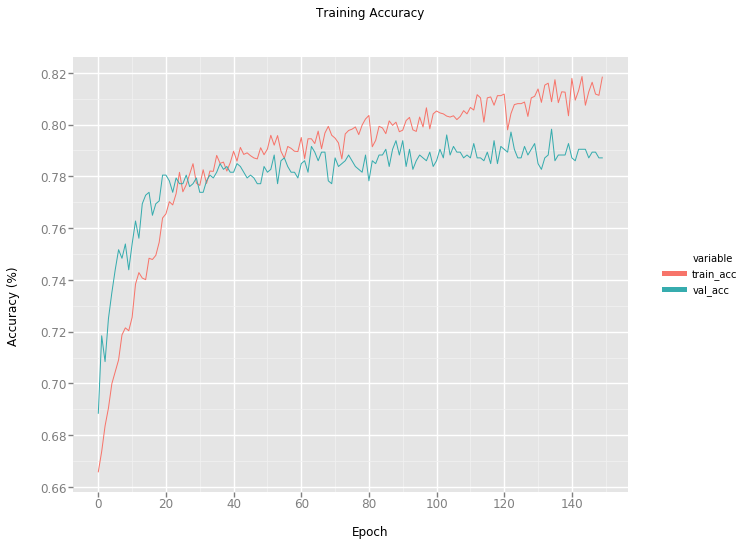

In [153]:
# Import ggplot (note - need to manually edit pandas lib import import call in ggplot folder for loading to work in py3.6)
from ggplot import *

# Plot Training Accuracy
p1 = ggplot(pd.melt(hist_df_acc, id_vars=['epoch']), aes(x='epoch', y='value', color='variable')) +\
    geom_line() +\
    xlab("Epoch") + ylab("Accuracy (%)") + ggtitle("Training Accuracy")

# Save plot
ggplot.save(p1, filename=os.path.join(project_dir,"graphs",'Acc_'+test_n+'.pdf'))

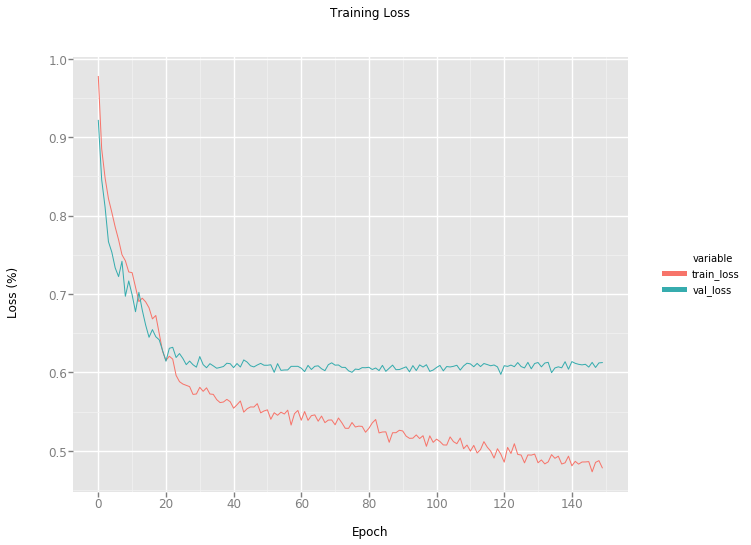

In [154]:
# Plot Training Loss
p2 = ggplot(pd.melt(hist_df_loss, id_vars=['epoch']), aes(x='epoch', y='value', color='variable')) +\
    geom_line() +\
    xlab("Epoch") + ylab("Loss (%)") + ggtitle("Training Loss")

# Save plot
ggplot.save(p2, filename=os.path.join(project_dir,"graphs",'Loss_'+test_n+'.pdf'))

As previously discussed (ref. Data Understanding), due to the imbalance in the dataset, overall accuracy is not the best metric for assessing model performance. In such cases, the area under the receiver operator characteristics curve (ROC AUC) provides a better measure (Buda et al. 2018). The ROC AUC builds on the data inherent in a confusion matrix by plotting the rate of true positives to false positives. ROC AUC characterises the ability of the model to distinguish between classes by visualising and quantifying the amount of type 1 and type 2 error (false positives and false negatives). Perfect classification performance would result in a ROC AUC equal to 1 for the classifier. In a multi-class context, the calculation uses the 'One vs. All' methodology where the curve for each classifier signifies the classification accuracy for that classifier compared to all other classifiers.

Figure 3 demonstrates the ROC AUC plot for the final model. As can be seen, the ROC AUC performance varies for each classifier. The difference in representation of each classifier is represented by the respective resolution. Referring to Table 4, classes with smaller sample representation are display rough curves on the ROC plot (eg. df and vasc), whereas classes with higher frequency display much smoother curves (eg. nv and mel). The rough curves for the small sample classes indicates that less certainty can be places in classification performance metric for these classes. Overall, the ROC plot indicates good classification performance with an average of 0.92. 

In [53]:
# Compute y_score (uncomment to use for new analyses)
#y_score = model.predict(X_test)

# Cache y_score (uncomment to use for new analyses)
#np.save(os.path.join(project_dir,"cache","y_score_"+test_n+".npy"), y_score)

In [134]:
# Load cached y_score
y_score = np.load(os.path.join(project_dir,"cache","y_score_"+test_n+".npy"))

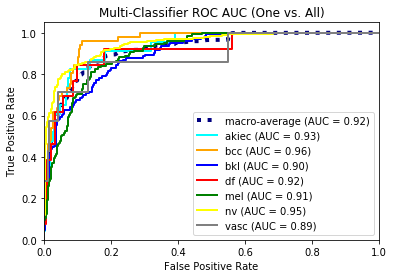

In [155]:
##### ROC AUC Plot
# Source: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
#plt.plot(fpr["micro"], tpr["micro"],
         #label='micro-average (AUC = {0:0.2f})'
               #''.format(roc_auc["micro"]),
         #color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'orange', 'blue','red','green','yellow','gray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(class_list[i], roc_auc[i]))

# Removed 50-50 curve as relevance is questionable in multi-class context (MT)
#plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Classifier ROC AUC (One vs. All)')
plt.legend(loc="lower right")
#plt.show()
savefig(os.path.join(project_dir,"graphs",'ROC_'+test_n+'.pdf'))

In [127]:
# Display table of classifiers including n
class_df.insert(0, 'Class #', range(0,len(class_df)))
class_df = class_df.set_index('Class #')
class_df

,n,dx
Class #,,
0,327,akiec
1,514,bcc
2,1099,bkl
3,115,df
4,1113,mel
5,6705,nv
6,142,vasc


**Table 4: Labels by Class Number**

# Conclusion
The model building process articulated above demonstrates the viability of the use of CNNs in the diagnosis of skin cancer. With easily attainable open source and cloud computing resources, an diagnostic tool providing high accuracy was constructed to aid primary healthcare workers at point of care. Further extension of this proof-of-concept would involve construction of a user interface and input pipeline. This would most likely constitute an Android application to be run on a smartphone. Users would photograph the suspect skin lesion using a smartphone camera through the app, which would then run the image through the deployed model and output the estimated classification including confidence levels based on the ROC AUC metric.

This study has also elucidated challenges for further research. For instance, the problems with imbalanced input data (ref. Data Understanding) are still an open research area (Buda et al. 2018). Mitigation strategies such as data augmentation and SMOTE only go so far. It is possible enhanced augmentation of minority classes could be achieved using separate neural networks as is the case with generative adversarial networks (GAN). However, the main issue is the requirement for increased quantities of quality, labeled data. Automating collection or crowdsourcing of these data are other areas that could be explored.

# Research Notes

This project presented me with the opportunity to explore CNNs and general neural networks to a much deeper level than had been covered in the lecture material. Building on the module reading list, I completed Standford University's CS231n module on CNNs. In addition I researched many papers related to the challenges involved in machine learning for medical imaging diagnostics, as well as batch normalisation, transfer learning and class imbalance.

Furthermore, the implementation of the models has broadened my practical skillset. Working exclusively in python was beneficial for my coding skills, but as I faced many challenges related to dependencies and software, it also gave me a key understanding of the importance of properly allocating environments. The hardware necessary for building neural network models was also new to me, having not worked previously with GPUs. Migrating to an Azure NC6 VM allowed me to work from home outside of business hours, as well as solving ongoing issues running Keras on my local machine.

Training and optimising the models themselves was a difficult process. There appears to be no standard for best practice in model optimisation, rather just many different rules of thumb. As the training time is considerable for certain implementations, this created a bottleneck to progression at times.

Overall this was an excellent experience for immersion in CNNs. The project familiarised me with deep domain knowledge, and the tools neccessary with which to implement CNNs efficiently and effectively. 

# References


@article{Shen2017,
author ={Shen, Dinggang and Wu, Guorong and Suk, Heung-Il}, 
title = {Deep Learning in Medical Image Analysis}, 
journal = {Annual Review of Biomedical Engineering}, 
volume = {19}, 
number = {1}, 
pages ={221-248}, 
year = {2017}, 
doi = {10.1146/annurev-bioeng-071516-044442}, 
note ={PMID: 28301734},
}



@article{Higgins2014,
	Author = {Higgins H William 2nd;C Lee Kachiu; Leffell David J},
	Date = {2014/05/06},
	Date-Added = {2019-01-23 16:46:13 +0000},
	Date-Modified = {2019-01-23 16:46:13 +0000},
	Db = {PubMed},
	Doi = {10.12703/P6-34},
	Isbn = {2051-7599; 2051-7599},
	J1 = {F1000Prime Rep},
	Journal = {F1000prime reports},
	L2 = {https://www.ncbi.nlm.nih.gov/pmc/PMC4017910/},
	Month = {05},
	Pages = {34; 34--34},
	Publisher = {Faculty of 1000 Ltd},
	Title = {Point of care cutaneous imaging technology in melanoma screening and mole mapping},
	Ty = {JOUR},
	U1 = {24860656{$[$}pmid{$]$}},
	U2 = {PMC4017910{$[$}pmcid{$]$}},
	U4 = {34{$[$}PII{$]$}},
	Url = {https://www.ncbi.nlm.nih.gov/pubmed/24860656},
	Volume = {6},
	Year = {2014},
	Bdsk-Url-1 = {https://www.ncbi.nlm.nih.gov/pubmed/24860656},
	Bdsk-Url-2 = {https://doi.org/10.12703/P6-34}}


@article{Siegel2018,
author = {Siegel, Rebecca L. and Miller, Kimberly D. and Jemal, Ahmedin},
title = {Cancer statistics, 2018},
journal = {CA: A Cancer Journal for Clinicians},
volume = {68},
number = {1},
pages = {7-30},
keywords = {cancer cases, cancer statistics, death rates, incidence, mortality},
doi = {10.3322/caac.21442},
url = {https://onlinelibrary.wiley.com/doi/abs/10.3322/caac.21442},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.3322/caac.21442},
year = {2018}
}


@article{Abbasi2004,
author = {Abbasi NR and Shaw HM and Rigel DS and et al},
title = {Early diagnosis of cutaneous melanoma: Revisiting the abcd criteria},
journal = {JAMA},
volume = {292},
number = {22},
pages = {2771-2776},
year = {2004},
doi = {10.1001/jama.292.22.2771},
URL = { + http://dx.doi.org/10.1001/jama.292.22.2771},
eprint = {/data/journals/jama/4955/jcr40044.pdf}
}



@article{Ebell2008,
author = {Ebell, Mark},
title = {Clinical diagnosis of melanoma},
journal = {American Family Physician},
volume = {15},
number = {78},
pages = {1205-1208},
year = {2008},
}


@article{Tschandl2018,
  author    = {Philipp Tschandl and
               Cliff Rosendahl and
               Harald Kittler},
  title     = {The {HAM10000} Dataset: {A} Large Collection of Multi-Source Dermatoscopic
               Images of Common Pigmented Skin Lesions},
  journal   = {CoRR},
  volume    = {abs/1803.10417},
  year      = {2018},
  url       = {http://arxiv.org/abs/1803.10417},
  archivePrefix = {arXiv},
  eprint    = {1803.10417},
  timestamp = {Mon, 13 Aug 2018 16:48:02 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1803-10417},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}


@article{Buda2018,
  author    = {Mateusz Buda and
               Atsuto Maki and
               Maciej A. Mazurowski},
  title     = {A systematic study of the class imbalance problem in convolutional
               neural networks},
  journal   = {CoRR},
  volume    = {abs/1710.05381},
  year      = {2017},
  url       = {http://arxiv.org/abs/1710.05381},
  archivePrefix = {arXiv},
  eprint    = {1710.05381},
  timestamp = {Mon, 13 Aug 2018 16:47:52 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1710-05381},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}

@article{Ramcharan2017,
  author    = {Amanda Ramcharan and
               Kelsee Baranowski and
               Peter McClowsky and
               Babuali Ahmed and
               James Legg and
               David Hughes},
  title     = {Using Transfer Learning for Image-Based Cassava Disease Detection},
  journal   = {CoRR},
  volume    = {abs/1707.03717},
  year      = {2017},
  url       = {http://arxiv.org/abs/1707.03717},
  archivePrefix = {arXiv},
  eprint    = {1707.03717},
  timestamp = {Mon, 13 Aug 2018 16:46:06 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/RamcharanBMALH17},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}

@article{Szegedy2015,
  author    = {Sergey Ioffe and
               Christian Szegedy},
  title     = {Batch Normalization: Accelerating Deep Network Training by Reducing
               Internal Covariate Shift},
  journal   = {CoRR},
  volume    = {abs/1502.03167},
  year      = {2015},
  url       = {http://arxiv.org/abs/1502.03167},
  archivePrefix = {arXiv},
  eprint    = {1502.03167},
  timestamp = {Mon, 13 Aug 2018 16:47:06 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/IoffeS15},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}